### Preject I : Pandas + Numpy + Visualization 

####  Title :  Bike Sharing Company

#### Objective : 
#### 1. Data Exploration : Exploratory Data Analysis : EDA
#### 2. Data Cleaning
#### 3. Data Analysis 

In [ ]:
# import all Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading data

df = pd.read_csv("hour.csv")

In [ ]:
df.shape

(17379, 17)

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Fields in the data:
	- instant: record index
	- dteday: date
	- season: season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr: year (0: 2011, 1: 2012)
	- mnth: month (1 to 12)
	- hr: hour (0 to 23)
	- holiday : whether the day is a holiday or not
	- weekday : day of the week
	- workingday : if the day is neither weekend nor a holiday is 1, otherwise is 0
	- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds
		- 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
	- temp : normalized temperature in Celsius; the values are divided to 41 (max)
	- atemp: normalized temperature felt in Celsius; the values are divided to 50 (max)
	- hum: normalized humidity; the values are divided to 100 (max)
	- windspeed: normalized wind speed; the values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [ ]:
# Check datatypes :

df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
# Renaming column attributes 

df.rename(columns= { 'instant': 'Sr No','dteday' : 'Date', 'holiday' : 'isHoliday', 'weekday' : 'isWeekday', 'workingday' : 'isWorkingday', 'hum' : 'humidity', 'cnt' : 'count' } , inplace = True)

In [ ]:
df.head()

,Sr No,Date,season,yr,mnth,hr,isHoliday,isWeekday,isWorkingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01/01/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Check Nulll values :

df.isnull().sum()

Sr No           0
Date            0
season          0
yr              0
mnth            0
hr              0
isHoliday       0
isWeekday       0
isWorkingday    0
weathersit      0
temp            0
atemp           0
humidity        0
windspeed       0
casual          0
registered      0
count           0
dtype: int64

In [ ]:
# Sanity Checks : 

# 1. count = casual + register

np.sum(df['casual'] + df['registered'] !=  df['count'])

# All rows follow casual + registered = count equation.

0

In [ ]:
# 2. Cross verify data.

In [ ]:
# 1. check column season

df['season'].unique()

# season is in required format

array([1, 2, 3, 4])

In [ ]:
# 2. yr 

df['yr'].unique()

array([0, 1])

In [ ]:
# 3. month

df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# 4. hr

df['hr'].unique()

# yr, month, hour is in required format

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
# 5. isHoliday

df['isHoliday'].unique()

array([0, 1])

In [ ]:
# 6. isWorkingday

df['isWorkingday'].unique()

array([0, 1])

In [ ]:
# Redundant Data => remove it.

df.drop(['Sr No', 'atemp', 'casual', 'registered'], axis = 1, inplace = True)

In [ ]:
df.head()

,Date,season,yr,mnth,hr,isHoliday,isWeekday,isWorkingday,weathersit,temp,humidity,windspeed,count
0,01/01/11,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,01/01/11,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,01/01/11,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,01/01/11,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,01/01/11,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [ ]:
# convering datatype 'object' into 'datetime'

df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Date            datetime64[ns]
season                   int64
yr                       int64
mnth                     int64
hr                       int64
isHoliday                int64
isWeekday                int64
isWorkingday             int64
weathersit               int64
temp                   float64
humidity               float64
windspeed              float64
count                    int64
dtype: object

In [ ]:
# Let us check statistical parameters : describe()

df['count'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: count, dtype: float64

#### Outliers 

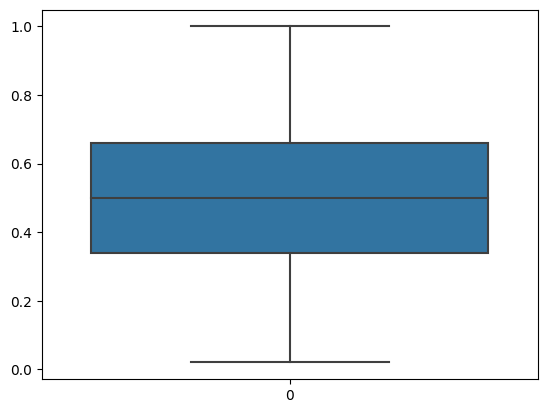

In [ ]:
# temp 

sns.boxplot(df['temp'])
plt.show()

<Axes: >

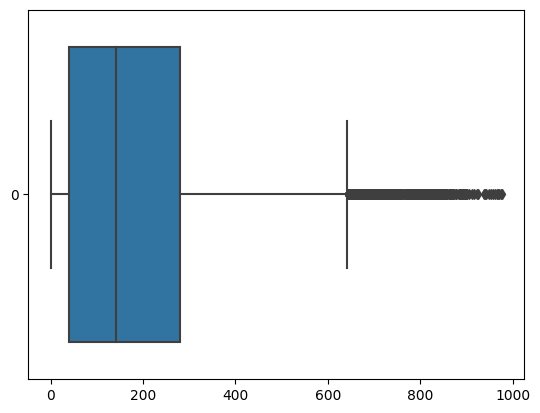

In [ ]:
# count

sns.boxplot(df['count'] , orient = "h")

####  Outlier Identification and Treatment 

In [ ]:
# Outliers => 1. Remove them  2. Mean, Mode, Median

In [ ]:
# percentile of the data : quantile()

a = [0.25, 0.50, 0.75, 0.90, 0.95,0.96, 0.97,0.98, 0.99]

df.quantile(a)['count']

<ipython-input-27-61ce60e01cba>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(a)['count']


0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.96    593.00
0.97    638.00
0.98    690.00
0.99    782.22
Name: count, dtype: float64

In [ ]:
3/100 * df.shape[0]

521.37

In [ ]:
df.shape

(17379, 13)

In [ ]:
17379 - 521

16858

In [ ]:
# 3% of data i.e, 520 no in count are outliers. 
# Remedy : Remove Outliers [count > 638]

df1 = df[(df['count'] < 593)].copy()

In [ ]:
df1.shape

(16678, 13)

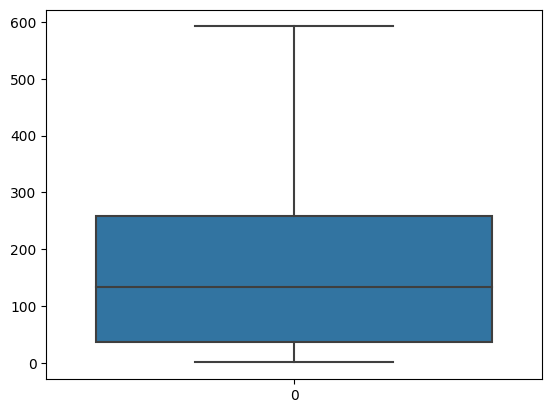

In [ ]:
sns.boxplot(df1['count'])
plt.show()

#### Data Analysis :

In [ ]:
# Past  | Present Instances to data  : Data Analysis 

#  1. Univariate Analysis 
#  2. Bi-Variate Analysis
#  3. Multivariate Analysis
#  4. Fractal Analysis

In [ ]:
df1.describe()

,season,yr,mnth,hr,isHoliday,isWeekday,isWorkingday,weathersit,temp,humidity,windspeed,count
count,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000,16678.000000
mean,2.486749,0.483211,6.507195,11.419055,0.029740,2.996163,0.679158,1.433625,0.491198,0.631897,0.189325,167.498321
std,1.114228,0.499733,3.471059,6.981710,0.169874,2.011983,0.466814,0.644162,0.192469,0.192443,0.122511,148.232031
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,37.000000
50%,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.640000,0.164200,133.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.790000,0.253700,259.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,592.000000


In [ ]:
# 1. Univariate Analysis :

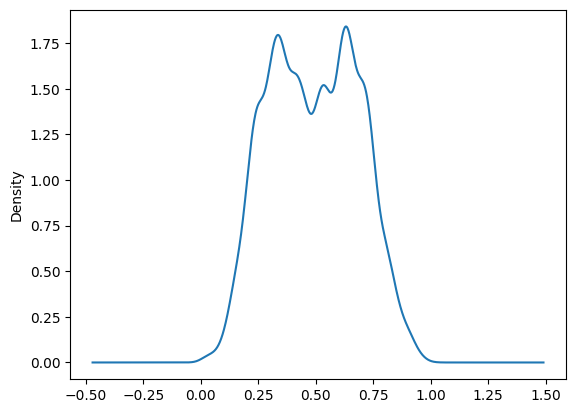

In [ ]:
# 1. Temp 

# Let us plot : Density plot 

df1['temp'].plot.density()
plt.show()

<Axes: >

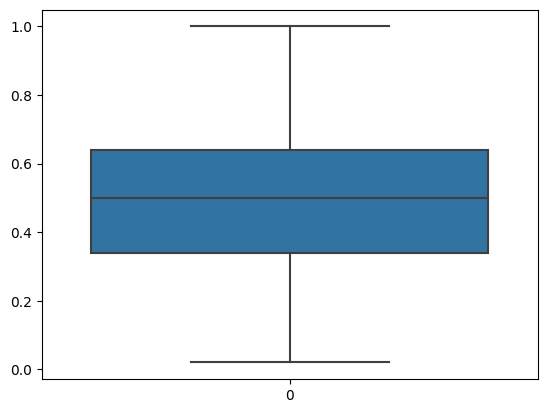

In [ ]:
# check outliers : temp

sns.boxplot(df1['temp'])

# No outliers for temp.

<Axes: ylabel='Frequency'>

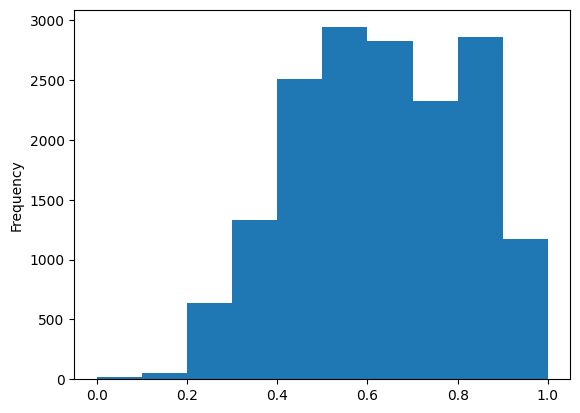

In [ ]:
# humidity

# Let us check data spread / abnormal high values 
# plot histogram()

df1['humidity'].plot.hist()

# No abnormaly high values are observed

<Axes: >

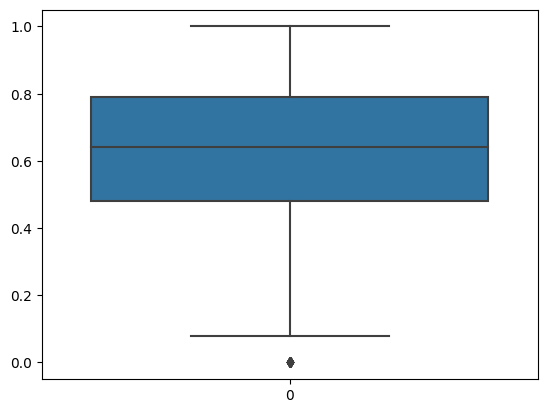

In [ ]:
sns.boxplot(df1['humidity'])

<Axes: ylabel='Density'>

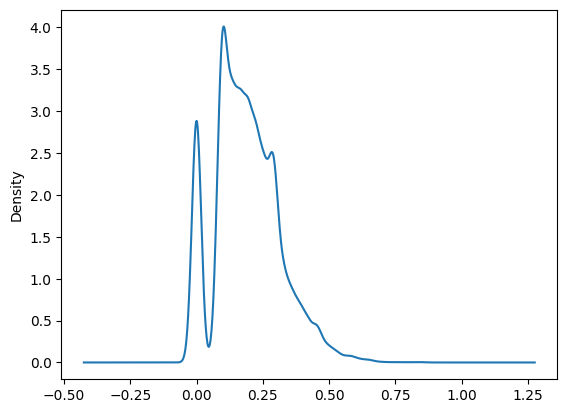

In [ ]:
# 3. windspeed

# density plot

df1['windspeed'].plot.density()

<Axes: >

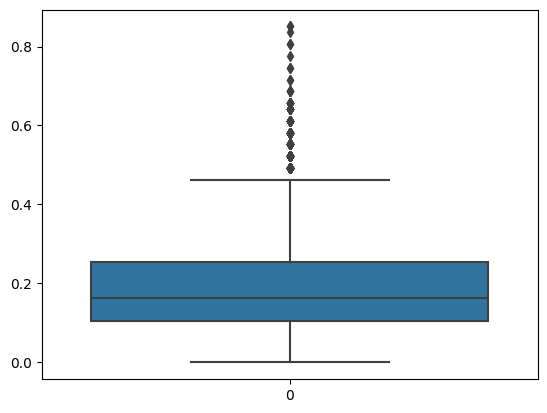

In [ ]:
sns.boxplot(df1['windspeed'])

In [ ]:
# percentile of the data : quantile()

a = [0.25, 0.50, 0.75, 0.90, 0.95,0.96, 0.97,0.98, 0.99]

df.quantile(a)['windspeed']

<ipython-input-43-758b001c0cfc>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.quantile(a)['windspeed']


0.25    0.1045
0.50    0.1940
0.75    0.2537
0.90    0.3582
0.95    0.4179
0.96    0.4179
0.97    0.4478
0.98    0.4627
0.99    0.5224
Name: windspeed, dtype: float64

In [ ]:
# There are outliers in windspeed. [ outliers : windspeed > 0.52] 
df1.shape

(16678, 13)

In [ ]:
16678 * 0.01

166.78

In [ ]:
16678 - 166

16512

In [ ]:
# Remedy for Outliers : Remove Outliers

df2 = df1[df1['windspeed'] < 0.52]

<Axes: >

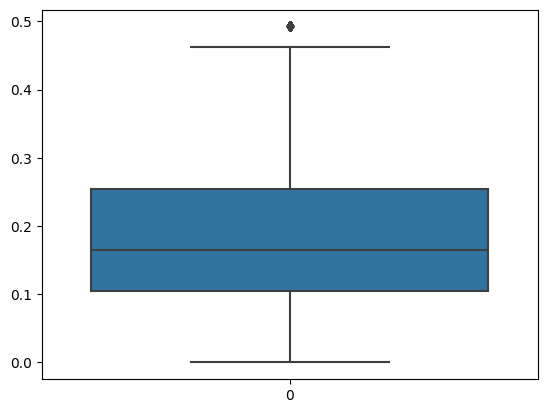

In [ ]:
# Checking Remedy Treatment for outliers

sns.boxplot(df2['windspeed'])

In [ ]:
# Bi Variate Analysis :

df2.corr()

<ipython-input-49-fb771e435faf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,season,yr,mnth,hr,isHoliday,isWeekday,isWorkingday,weathersit,temp,humidity,windspeed,count
season,1.000000,-0.022264,0.829869,-0.008235,-0.009312,-0.001790,0.012275,-0.017778,0.313312,0.150592,-0.135429,0.172750
yr,-0.022264,1.000000,-0.018994,-0.020365,0.014201,-0.009339,-0.008563,-0.006907,0.016415,-0.063829,-0.018017,0.174715
mnth,0.829869,-0.018994,1.000000,-0.004883,0.017312,0.010512,-0.002733,0.002332,0.202776,0.162897,-0.125250,0.116987
hr,-0.008235,-0.020365,-0.004883,1.000000,0.003388,-0.005300,-0.003120,-0.014606,0.122492,-0.264751,0.128212,0.429604
isHoliday,-0.009312,0.014201,0.017312,0.003388,1.000000,-0.102996,-0.255431,-0.018708,-0.024432,-0.015476,0.006406,-0.017171
isWeekday,-0.001790,-0.009339,0.010512,-0.005300,-0.102996,1.000000,0.045765,0.006023,-0.003378,-0.033091,0.006593,0.023155
isWorkingday,0.012275,-0.008563,-0.002733,-0.003120,-0.255431,0.045765,1.000000,0.046490,0.050922,0.010556,-0.005715,0.000324
weathersit,-0.017778,-0.006907,0.002332,-0.014606,-0.018708,0.006023,0.046490,1.000000,-0.099634,0.413191,0.027586,-0.133177
temp,0.313312,0.016415,0.202776,0.122492,-0.024432,-0.003378,0.050922,-0.099634,1.000000,-0.056580,-0.016319,0.400833
humidity,0.150592,-0.063829,0.162897,-0.264751,-0.015476,-0.033091,0.010556,0.413191,-0.056580,1.000000,-0.276578,-0.327140


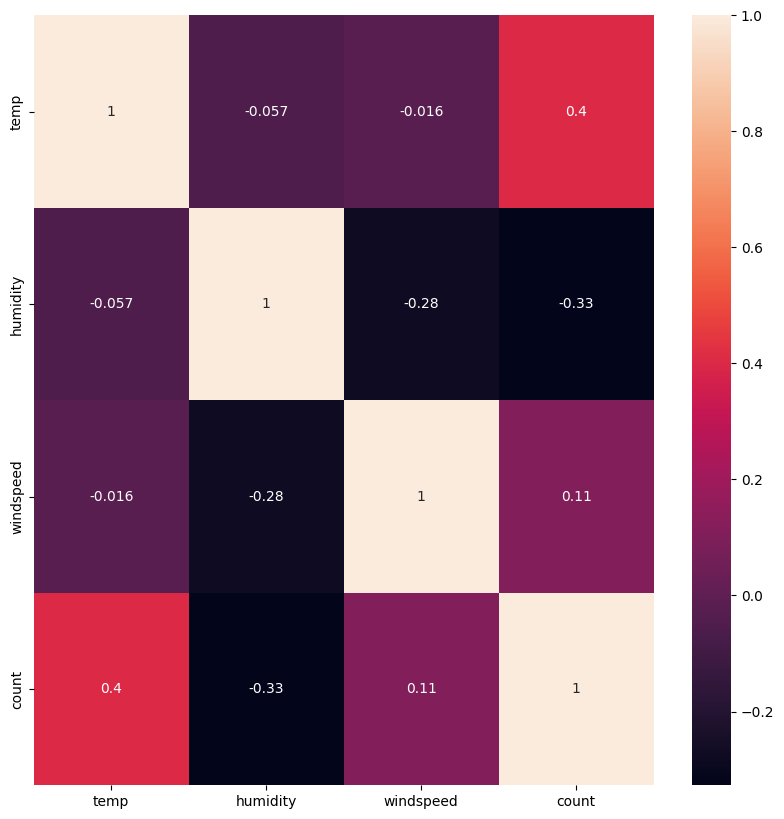

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df2[['temp', 'humidity', 'windspeed','count']].corr(), annot = True)
plt.show()

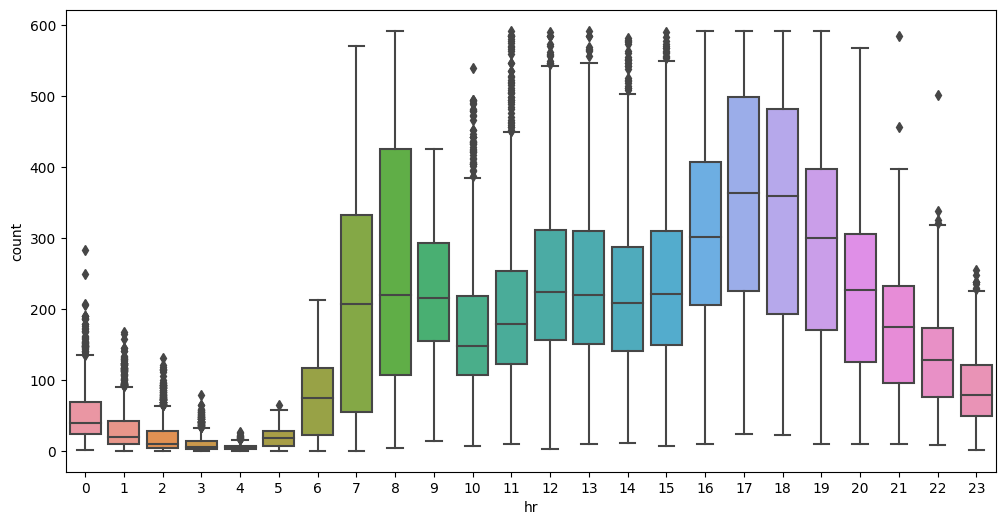

In [ ]:
# 1. Find Relationship between 'hr' and 'count'

# boxplot() for 'hr' vs 'count'

plt.figure(figsize= (12,6))
sns.boxplot( x= 'hr', y= 'count', data= df2)
plt.show()

In [ ]:
# Observations : It is evident that peak hour traffic is during 7 to 9am and 12 to 21.
# Hypothesis  : A lot of people commute to office during 7 to 9am and 12 to 21.

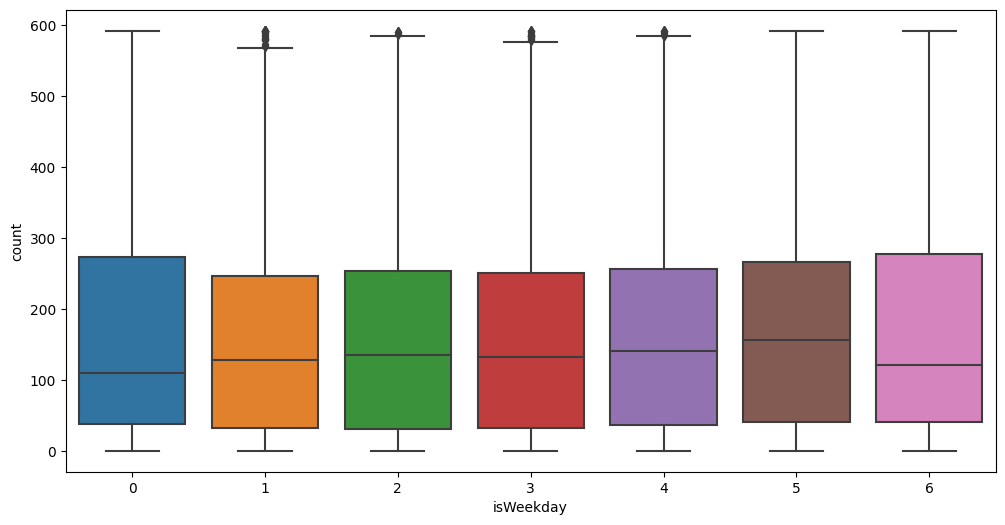

In [ ]:
# Find Relationship between 'isWeekday' and 'count'
# boxplot()


plt.figure(figsize= (12,6))
sns.boxplot( x= 'isWeekday', y= 'count', data= df2)
plt.show()


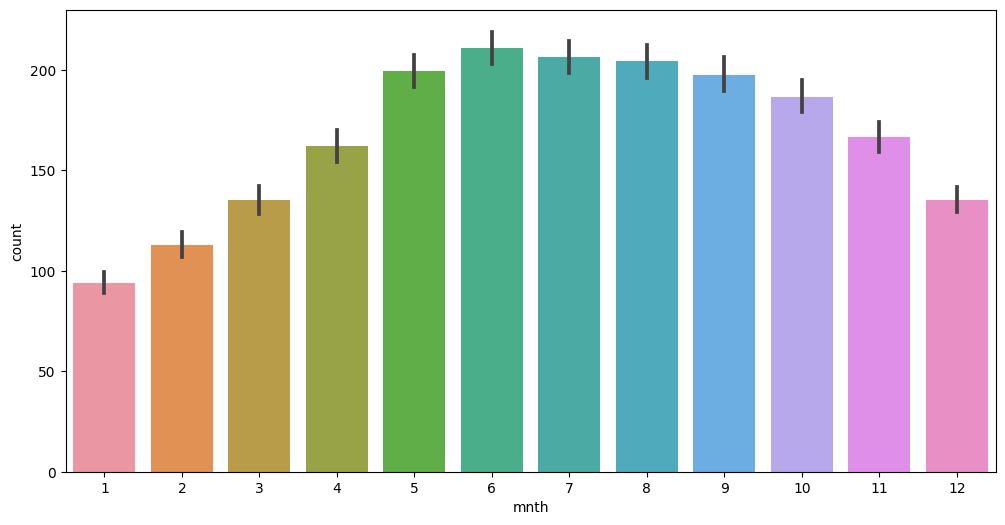

In [ ]:
# Find Relationship between 'mnth' and 'count'

plt.figure(figsize= (12,6))
sns.barplot( x= 'mnth', y= 'count', data= df2)
plt.show()


In [ ]:
# Observation : 1,2,3,11,12 have least bike sharing instances.

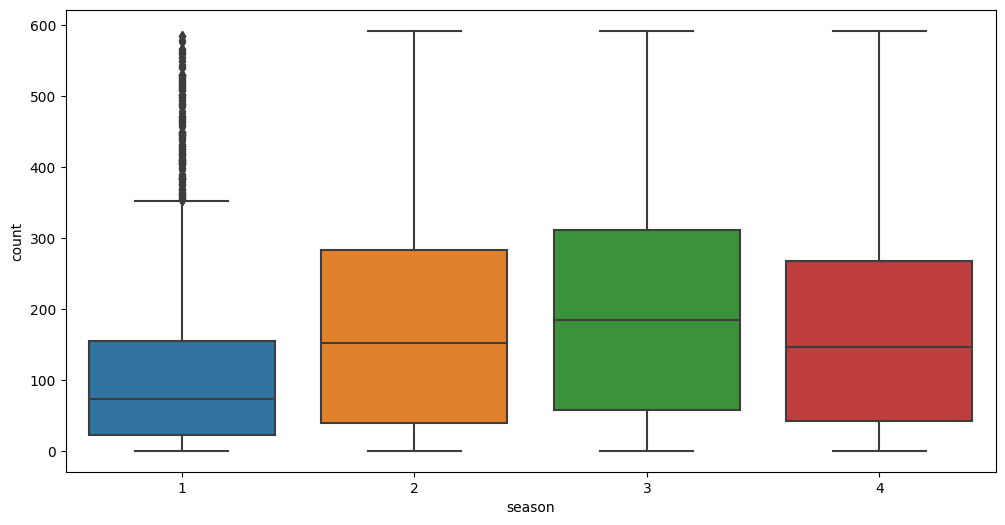

In [ ]:
# # Find Relationship between 'season' and 'count'

plt.figure(figsize= (12,6))
sns.boxplot( x= 'season', y= 'count', data= df2)
plt.show()